In [1]:
# vizualization
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

import pickle


# Faster R-CNN-R50-FPN, COCO

In [2]:
# save log data to pickle
fpn_reg_loss = [
    0.3121,
    0.2797,
    0.2669,
    0.2583,
    0.2529,
    0.2488,
    0.2453,
    0.2424,
    0.2402,
    0.2384,
    0.2368,
    0.2353,
    0.2343,
    0.2330,
    0.2320,
    0.2311,
    0.2119,
    0.2069,
    0.2043,
    0.2021,
    0.2002,
    0.1983,
    0.1930,
    0.1924,
    0.1918,
    0.1914
]


fpn_cls_loss = [
    0.3532,
    0.2800,
    0.2626,
    0.2522,
    0.2457,
    0.2409,
    0.2365,
    0.2331,
    0.2303,
    0.2279,
    0.2257,
    0.2238,
    0.2225,
    0.2208,
    0.2194,
    0.2181,
    0.1784,
    0.1707,
    0.1669,
    0.1638,
    0.1613,
    0.1586,
    0.1514,
    0.1504,
    0.1498,
    0.1493,
]

fpn_reg_loss = np.array(fpn_reg_loss)
fpn_cls_loss = np.array(fpn_cls_loss)
# save to pickle
with open("fpn_reg_loss.pkl", "wb") as f:
    pickle.dump(fpn_reg_loss, f)
with open("fpn_cls_loss.pkl", "wb") as f:
    pickle.dump(fpn_cls_loss, f)

In [3]:
# save log data to pickle
ours_reg_loss = [
    0.3087,
    0.2770,
    0.2643,
    0.2569,
    0.2512,
    0.2475,
    0.2440,
    0.2414,
    0.2393,
    0.2378,
    0.2360,
    0.2348,
    0.2339,
    0.2324,
    0.2314,
    0.2305,
    0.2116,
    0.2068,
    0.2042,
    0.2021,
    0.2002,
    0.1985,
    0.1934,
    0.1926,
    0.1921,
    0.1919,
]

ours_cls_loss = [
    0.3470,
    0.2732,
    0.2551,
    0.2451,
    0.2374,
    0.2322,
    0.2280,
    0.2245,
    0.2215,
    0.2195,
    0.2169,
    0.2154,
    0.2138,
    0.2117,
    0.2109,
    0.2097,
    0.1718,   
    0.1645,
    0.1608,
    0.1580,
    0.1553,
    0.1533,
    0.1465,
    0.1455,
    0.1450,
    0.1447,
]

ours_reg_loss = np.array(ours_reg_loss)
ours_cls_loss = np.array(ours_cls_loss)
# save to pickle
with open("ours_reg_loss.pkl", "wb") as f:
    pickle.dump(ours_reg_loss, f)
with open("ours_cls_loss.pkl", "wb") as f:
    pickle.dump(ours_cls_loss, f)

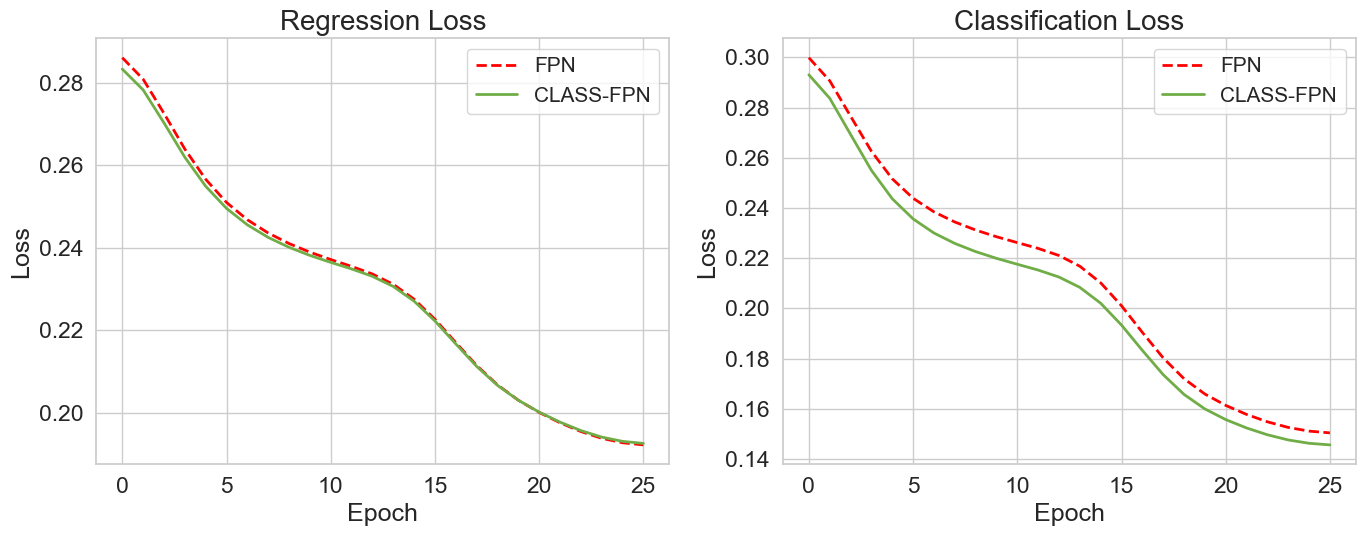

In [4]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.ndimage import gaussian_filter1d

# Seaborn 스타일 설정
sns.set_theme(style="whitegrid", palette="muted", font_scale=1.5)

# 데이터 로드
fpn_reg_loss = pickle.load(open("fpn_reg_loss.pkl", "rb"))
fpn_cls_loss = pickle.load(open("fpn_cls_loss.pkl", "rb"))
ours_reg_loss = pickle.load(open("ours_reg_loss.pkl", "rb"))
ours_cls_loss = pickle.load(open("ours_cls_loss.pkl", "rb"))

# 부드럽게 만들기 (Gaussian smoothing)
smooth_fpn_reg = gaussian_filter1d(fpn_reg_loss, sigma=2)
smooth_ours_reg = gaussian_filter1d(ours_reg_loss, sigma=2)
smooth_fpn_cls = gaussian_filter1d(fpn_cls_loss, sigma=2)
smooth_ours_cls = gaussian_filter1d(ours_cls_loss, sigma=2)

# Plot 설정
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# === Regression Loss Plot ===
x = np.arange(len(smooth_fpn_reg))
ax1.plot(smooth_fpn_reg,  label="FPN", color="red", linestyle="--", linewidth=2, alpha=1.0)
ax1.plot(smooth_ours_reg, label="CLASS-FPN", color="#70AD47", linestyle="-", linewidth=2)

ax1.set_title("Regression Loss", fontsize=20)
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend(loc="upper right", fontsize=15)

# === Classification Loss Plot ===
ax2.plot(smooth_fpn_cls,  label="FPN", color="red", linestyle="--", linewidth=2, alpha=1.0)
ax2.plot(smooth_ours_cls, label="CLASS-FPN", color="#70AD47", linestyle="-", linewidth=2)

ax2.set_title("Classification Loss", fontsize=20)
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Loss")
ax2.legend(loc="upper right", fontsize=15)

# 전체 제목 및 저장
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("ours_loss_comparison_emphasized.png", dpi=1200)
plt.show()

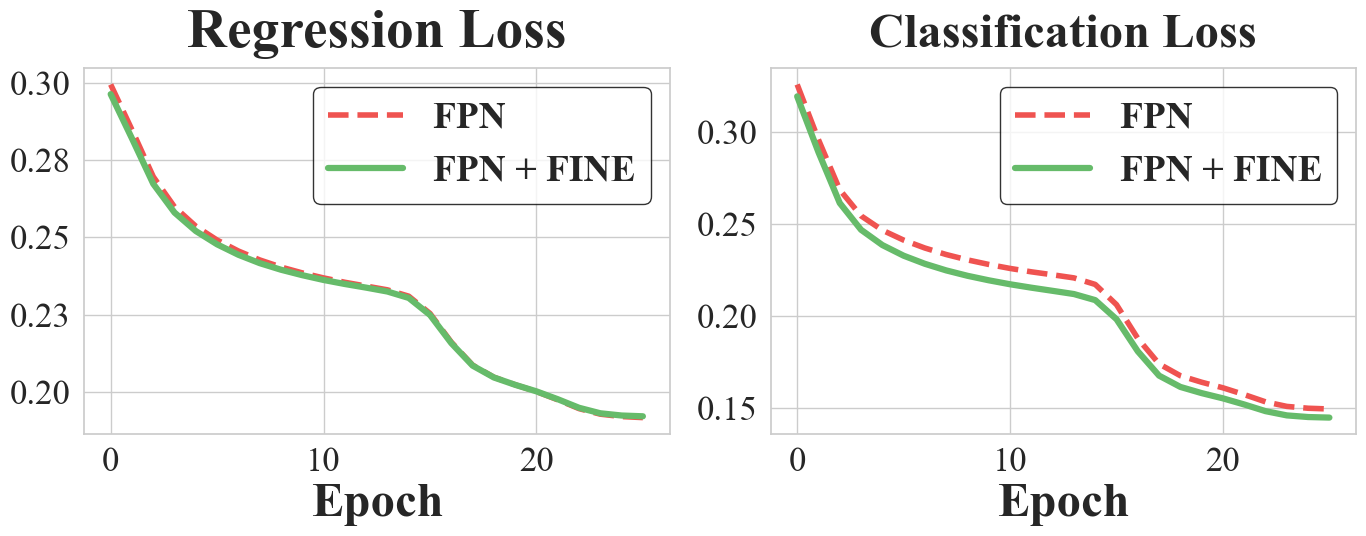

In [5]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.ndimage import gaussian_filter1d
from matplotlib.ticker import FormatStrFormatter

from matplotlib import rcParams, font_manager
# 시스템에 설치된 Times New Roman 경로 검색
font_paths = [f.fname for f in font_manager.fontManager.ttflist if "Times New Roman" in f.name]
if font_paths:
    rcParams["font.family"] = "Times New Roman"
else:
    print("⚠️ 'Times New Roman' not found on your system. Default font will be used.")
plt.rcParams["font.family"] = "Times New Roman"


# 데이터 로드
fpn_reg_loss = pickle.load(open("fpn_reg_loss.pkl", "rb"))
fpn_cls_loss = pickle.load(open("fpn_cls_loss.pkl", "rb"))
ours_reg_loss = pickle.load(open("ours_reg_loss.pkl", "rb"))
ours_cls_loss = pickle.load(open("ours_cls_loss.pkl", "rb"))

# Gaussian smoothing
smooth_fpn_reg = gaussian_filter1d(fpn_reg_loss, sigma=1)
smooth_ours_reg = gaussian_filter1d(ours_reg_loss, sigma=1)
smooth_fpn_cls = gaussian_filter1d(fpn_cls_loss, sigma=1)
smooth_ours_cls = gaussian_filter1d(ours_cls_loss, sigma=1)

# Plot 설정
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# 색상 고정
# fpn_color = "red"
# ours_color = "#70AD47"  # 기존 FPN + FINE 색상

# ▶ 더 진한 색상으로 교체
fpn_color = "#EF5350"   # 연한 빨강 (Light Red)
ours_color = "#66BB6A"  # 연한 초록 (Light Green)

# 범례 정렬을 위한 공백
fpn_label = "FPN       "
class_label = "FPN + FINE"

# === Regression Loss Plot ===
ax1.plot(smooth_fpn_reg, label=fpn_label, color=fpn_color, linestyle="--", linewidth=4, alpha=1.0)
ax1.plot(smooth_ours_reg, label=class_label, color=ours_color, linestyle="-", linewidth=4.5)

ax1.set_title("Regression Loss", fontsize=40, fontweight="bold", pad=15)
ax1.set_xlabel("Epoch", fontsize=35, fontweight="bold")
# ax1.set_ylabel("Loss", fontsize=35, fontweight="bold")
ax1.tick_params(axis="both", labelsize=25)
ax1.legend(
    loc="upper right",
    frameon=True,
    edgecolor='black',
    prop={"weight": "bold", "size": 27}
)
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

# === Classification Loss Plot ===
ax2.plot(smooth_fpn_cls, label=fpn_label, color=fpn_color, linestyle="--", linewidth=4, alpha=1.0)
ax2.plot(smooth_ours_cls, label=class_label, color=ours_color, linestyle="-", linewidth=4.5)

ax2.set_title("Classification Loss", fontsize=35, fontweight="bold", pad=15)
ax2.set_xlabel("Epoch", fontsize=35, fontweight="bold")
# ax2.set_ylabel("Loss", fontsize=40, fontweight="bold")
ax2.tick_params(axis="both", labelsize=25)
ax2.legend(
    loc="upper right",
    frameon=True,
    edgecolor='black',
    prop={"weight": "bold", "size": 27}
)


# 전체 여백 및 저장
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("fig4.pdf", bbox_inches="tight")
plt.show()

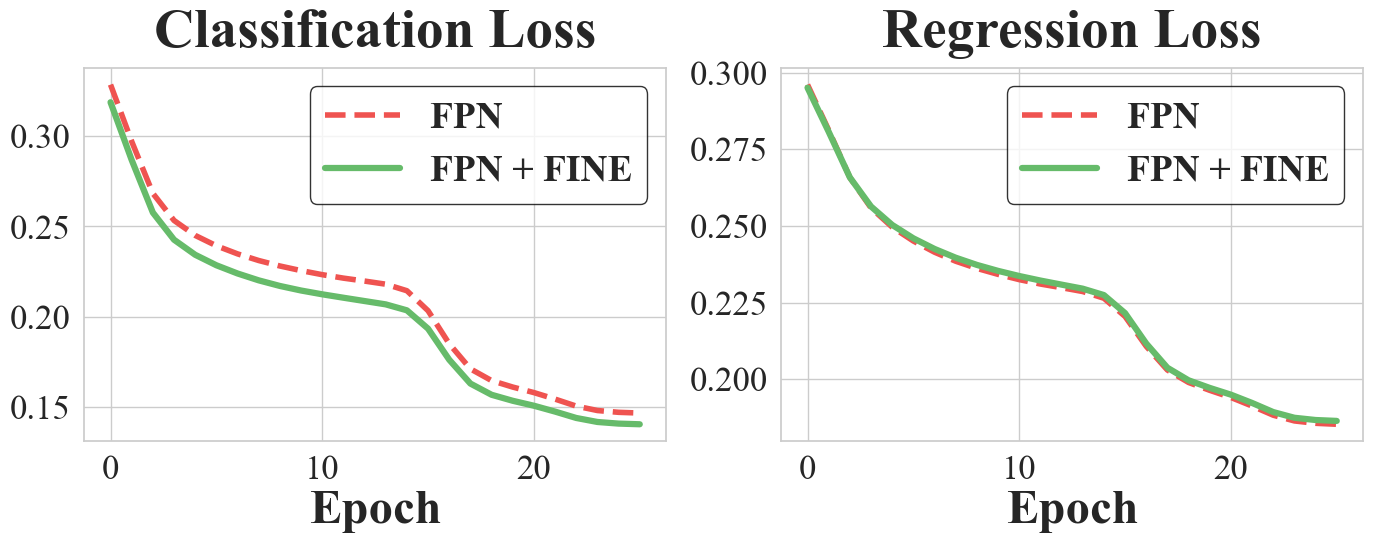

In [20]:
# Plot 설정
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# 색상 고정
fpn_color = "#EF5350"   # 연한 빨강 (Light Red)
ours_color = "#66BB6A"  # 연한 초록 (Light Green)

# 범례 정렬을 위한 공백
fpn_label = "FPN       "
class_label = "FPN + FINE"

# === Classification Loss Plot (왼쪽) ===
ax1.plot(smooth_fpn_cls, label=fpn_label, color=fpn_color, linestyle="--", linewidth=4, alpha=1.0)
ax1.plot(smooth_ours_cls, label=class_label, color=ours_color, linestyle="-", linewidth=4.5)

ax1.set_title("Classification Loss", fontsize=40, fontweight="bold", pad=15)
ax1.set_xlabel("Epoch", fontsize=35, fontweight="bold")
ax1.tick_params(axis="both", labelsize=25)
ax1.legend(
    loc="upper right",
    frameon=True,
    edgecolor='black',
    prop={"weight": "bold", "size": 27}
)
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

# === Regression Loss Plot (오른쪽) ===
ax2.plot(smooth_fpn_reg, label=fpn_label, color=fpn_color, linestyle="--", linewidth=4, alpha=1.0)
ax2.plot(smooth_ours_reg, label=class_label, color=ours_color, linestyle="-", linewidth=4.5)

ax2.set_title("Regression Loss", fontsize=40, fontweight="bold", pad=15)
ax2.set_xlabel("Epoch", fontsize=35, fontweight="bold")
ax2.tick_params(axis="both", labelsize=25)
ax2.legend(
    loc="upper right",
    frameon=True,
    edgecolor='black',
    prop={"weight": "bold", "size": 27}
)

# 전체 여백 및 저장
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("fig4.pdf", bbox_inches="tight")
plt.show()

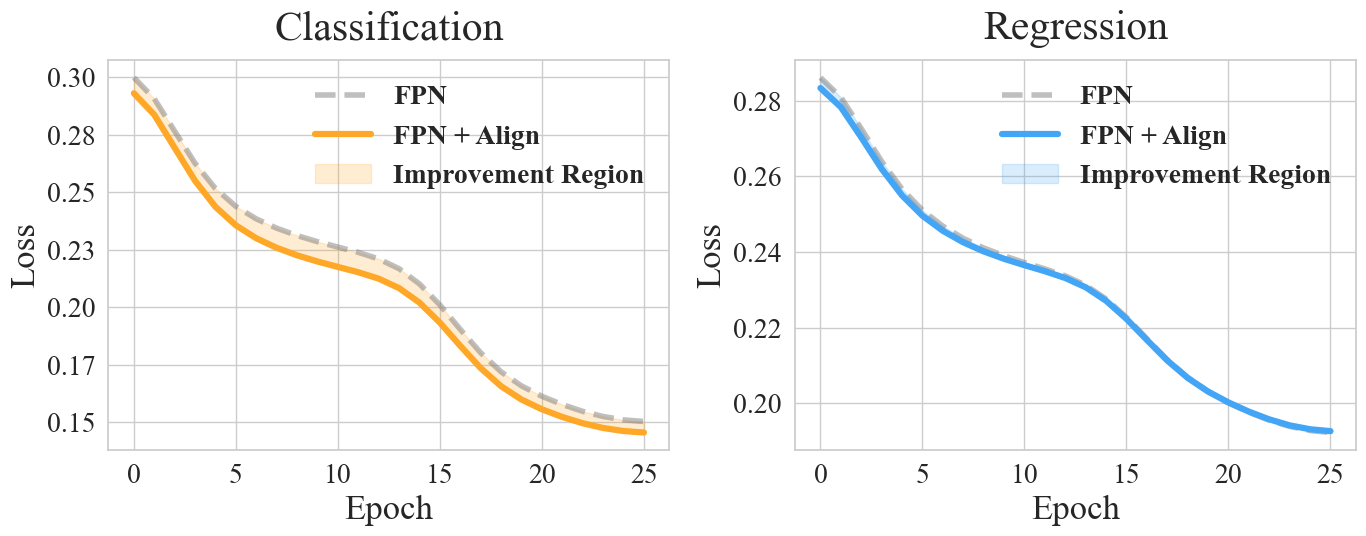

In [7]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from matplotlib.ticker import FormatStrFormatter

# === 데이터 로드
fpn_reg_loss = pickle.load(open("fpn_reg_loss.pkl", "rb"))
fpn_cls_loss = pickle.load(open("fpn_cls_loss.pkl", "rb"))
ours_reg_loss = pickle.load(open("ours_reg_loss.pkl", "rb"))
ours_cls_loss = pickle.load(open("ours_cls_loss.pkl", "rb"))

# === Gaussian smoothing
smooth_fpn_reg = gaussian_filter1d(fpn_reg_loss, sigma=2)
smooth_ours_reg = gaussian_filter1d(ours_reg_loss, sigma=2)
smooth_fpn_cls = gaussian_filter1d(fpn_cls_loss, sigma=2)
smooth_ours_cls = gaussian_filter1d(ours_cls_loss, sigma=2)

# === Plot 설정
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# === 색상 설정
fpn_color = "gray"         # 회색 (baseline 모두 공통)
cls_color = "#FFA726"      # 주황 (ours classification)
reg_color = "#42A5F5"      # 파랑 (ours regression)
fpn_label = "FPN"
ours_cls_label = "FPN + Align"
ours_reg_label = "FPN + Align"

# === [왼쪽] Classification Loss Plot
x_cls = np.arange(len(smooth_fpn_cls))
mask_cls = smooth_ours_cls < smooth_fpn_cls

ax1.plot(smooth_fpn_cls, label=fpn_label, color=fpn_color, linestyle="--", linewidth=4, alpha=0.5)
ax1.plot(smooth_ours_cls, label=ours_cls_label, color=cls_color, linestyle="-", linewidth=4.5)
ax1.fill_between(
    x_cls, smooth_fpn_cls, smooth_ours_cls,
    where=mask_cls, interpolate=True,
    color=cls_color, alpha=0.2,  # <-- ours와 같은 색상, 투명도 낮춤
    label="Improvement Region"
)

ax1.set_title("Classification", fontsize=30, pad=15)
ax1.set_xlabel("Epoch", fontsize=25)
ax1.set_ylabel("Loss", fontsize=25)
ax1.tick_params(axis="both", labelsize=20)
ax1.legend(loc="upper right", frameon=False, prop={"weight": "bold", "size": 20})
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

# === [오른쪽] Regression Loss Plot
x_reg = np.arange(len(smooth_fpn_reg))
mask_reg = smooth_ours_reg < smooth_fpn_reg

ax2.plot(smooth_fpn_reg, label=fpn_label, color=fpn_color, linestyle="--", linewidth=4, alpha=0.5)
ax2.plot(smooth_ours_reg, label=ours_reg_label, color=reg_color, linestyle="-", linewidth=4.5)
ax2.fill_between(
    x_reg, smooth_fpn_reg, smooth_ours_reg,
    where=mask_reg, interpolate=True,
    color=reg_color, alpha=0.2,  # <-- ours와 같은 색상, 투명도 낮춤
    label="Improvement Region"
)
ax2.set_title("Regression", fontsize=30, pad=15)
ax2.set_xlabel("Epoch", fontsize=25)
ax2.set_ylabel("Loss", fontsize=25)
ax2.tick_params(axis="both", labelsize=20)
ax2.legend(loc="upper right", frameon=False, prop={"weight": "bold", "size": 20})
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

# === 전체 저장
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("fig4.png", bbox_inches="tight", dpi=1200)
plt.show()

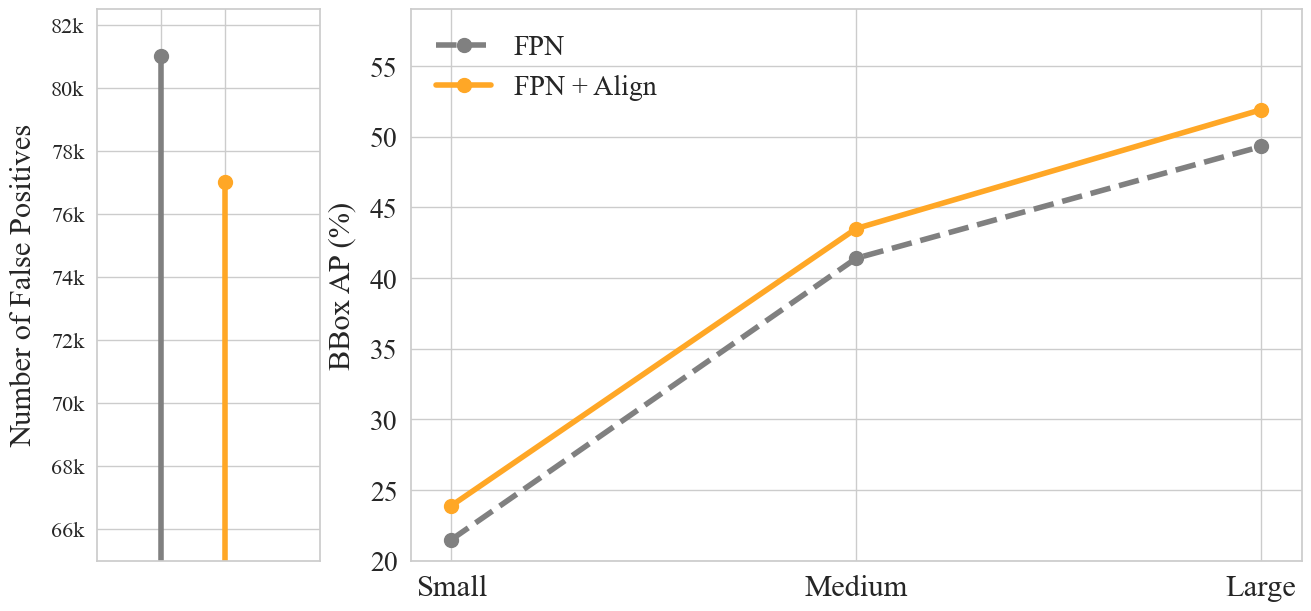

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter
from matplotlib.lines import Line2D

# 색상 정의
baseline_color = "gray"
ours_color = "#FFA726"

# 데이터 정의
baseline_fp = 81013
ours_fp = 77026

sizes = ['Small', 'Medium', 'Large']
x = np.arange(len(sizes))

# Detection AP only (→ 퍼센트 변환)
baseline_bbox_ap = np.array([0.215, 0.414, 0.493]) * 100
ours_bbox_ap     = np.array([0.239, 0.435, 0.519]) * 100

# === Figure 설정
fig = plt.figure(figsize=(13, 6), constrained_layout=True)
gs = fig.add_gridspec(1, 5)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1:])

bar_positions = [0, 0.001]

# 롤리팝 그래프
# 롤리팝 그래프
ax1.vlines(x=bar_positions, ymin=0, ymax=[baseline_fp, ours_fp],
           color=[baseline_color, ours_color], linewidth=4)
ax1.plot(bar_positions[0], baseline_fp, 'o', color=baseline_color, markersize=10)
ax1.plot(bar_positions[1], ours_fp, 'o', color=ours_color, markersize=10)

ax1.set_xticks(bar_positions)
ax1.set_xticklabels(['', ''])
ax1.set_xlim(-0.001, 0.0025)

ax1.set_ylabel("Number of False Positives", fontsize=22, labelpad=10)
ax1.tick_params(axis='y', labelsize=16)
ax1.set_ylim(65000, 82500)
ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x/1000)}k"))

# Detection AP 그래프
ax2.plot(x, baseline_bbox_ap, marker='o', linewidth=4, markersize=10,
         color=baseline_color, linestyle='--', label='FPN')
ax2.plot(x, ours_bbox_ap, marker='o', linewidth=4, markersize=10,
         color=ours_color, label='FPN + Align')

ax2.set_xticks(x)
ax2.set_xticklabels(sizes, fontsize=22)
ax2.set_ylabel("BBox AP (%)", fontsize=22, labelpad=10)
ax2.tick_params(axis='y', labelsize=20)
ax2.set_ylim(20, 59)

# 오른쪽 그래프 내부 왼쪽 상단에 legend 배치 (글씨 크게)
ax2.legend(
    fontsize=20,
    loc='upper left',
    frameon=False
)

# 저장 및 출력
plt.savefig("fig5_ap_lineplot_lollipop_ax2legend_top_left.pdf", bbox_inches="tight", dpi=600)
plt.show()

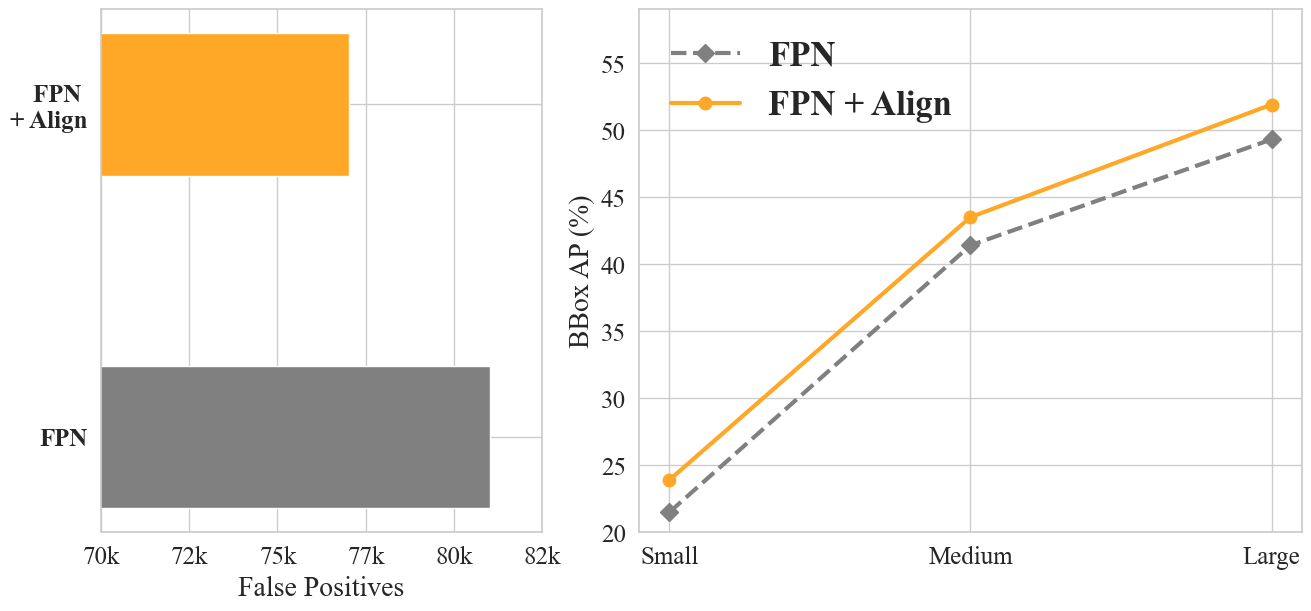

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

# 색상 정의
baseline_color = "gray"
ours_color = "#FFA726"

# 데이터 정의
baseline_fp = 81013
ours_fp = 77026

sizes = ['Small', 'Medium', 'Large']
x = np.arange(len(sizes))

baseline_ap = np.array([0.215, 0.414, 0.493]) * 100
ours_ap     = np.array([0.239, 0.435, 0.519]) * 100

# Figure 설정
fig = plt.figure(figsize=(13, 6), constrained_layout=True)
gs = fig.add_gridspec(1, 5)

# === 왼쪽: 수평 막대 그래프 (False Positives)
ax1 = fig.add_subplot(gs[0, :2])
ax1.barh(y=[0.15, 0.85], width=[baseline_fp, ours_fp],
         height=0.3, color=[baseline_color, ours_color])

ax1.set_yticks([0.15, 0.85])
ax1.set_yticklabels(['FPN', 'FPN \n+ Align'], fontsize=18, weight='bold')
ax1.set_xlabel("False Positives", fontsize=20)
ax1.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x/1000)}k"))
ax1.tick_params(axis='x', labelsize=18)
ax1.set_xlim(70000, 82500)

# === 오른쪽: BBox AP 라인 그래프
ax2 = fig.add_subplot(gs[0, 2:])
ax2.plot(x, baseline_ap, marker='D', linewidth=3, markersize=9,
         color=baseline_color, linestyle='--', label='FPN')

ax2.plot(x, ours_ap, marker='o', linewidth=3, markersize=9,
         color=ours_color, label='FPN + Align')

ax2.set_xticks(x)
ax2.set_xticklabels(sizes, fontsize=18)
ax2.set_ylabel("BBox AP (%)", fontsize=20)
ax2.tick_params(axis='y', labelsize=18)
ax2.set_ylim(20, 59)
# bold, font 
ax2.legend(loc='upper left', fontsize=22, frameon=False, prop={'weight': 'bold', 'size': 25})

# 저장 및 출력
plt.savefig("fig5.png", bbox_inches="tight", dpi=1200)
plt.show()

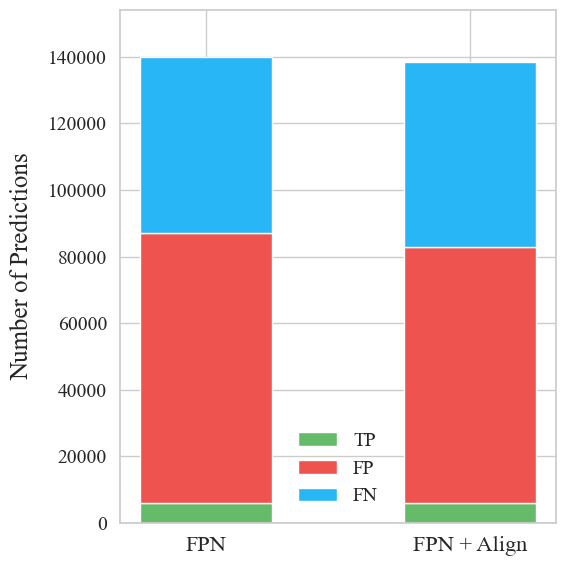

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# 색상 정의
tp_color = "#66BB6A"  # Green
fp_color = "#EF5350"  # Red
fn_color = "#29B6F6"  # Blue

# 예시 데이터
# NOTE: TP와 FN은 예시입니다. 실제 값 넣으면 더 정확해요
fp = [81013, 77026]
tp = [5939, 5881]
fn = [53104, 55561]  # 필요 시 실제 값으로 교체


models = ["FPN", "FPN + Align"]
x = np.arange(len(models))
bar_width = 0.5

# Figure 설정
plt.figure(figsize=(6, 6))
plt.bar(x, tp, width=bar_width, label='TP', color=tp_color)
plt.bar(x, fp, width=bar_width, bottom=tp, label='FP', color=fp_color)
plt.bar(x, fn, width=bar_width, bottom=np.array(tp) + np.array(fp), label='FN', color=fn_color)

# 시각화 세부 설정
plt.xticks(x, models, fontsize=16)
plt.ylabel("Number of Predictions", fontsize=18, labelpad=10)
plt.yticks(fontsize=14)
plt.legend(fontsize=14, frameon=False)
plt.ylim(0, max(np.array(tp) + np.array(fp) + np.array(fn)) * 1.1)

plt.tight_layout()
plt.savefig("fig_fp_stacked_bar.pdf", dpi=600, bbox_inches="tight")
plt.show()

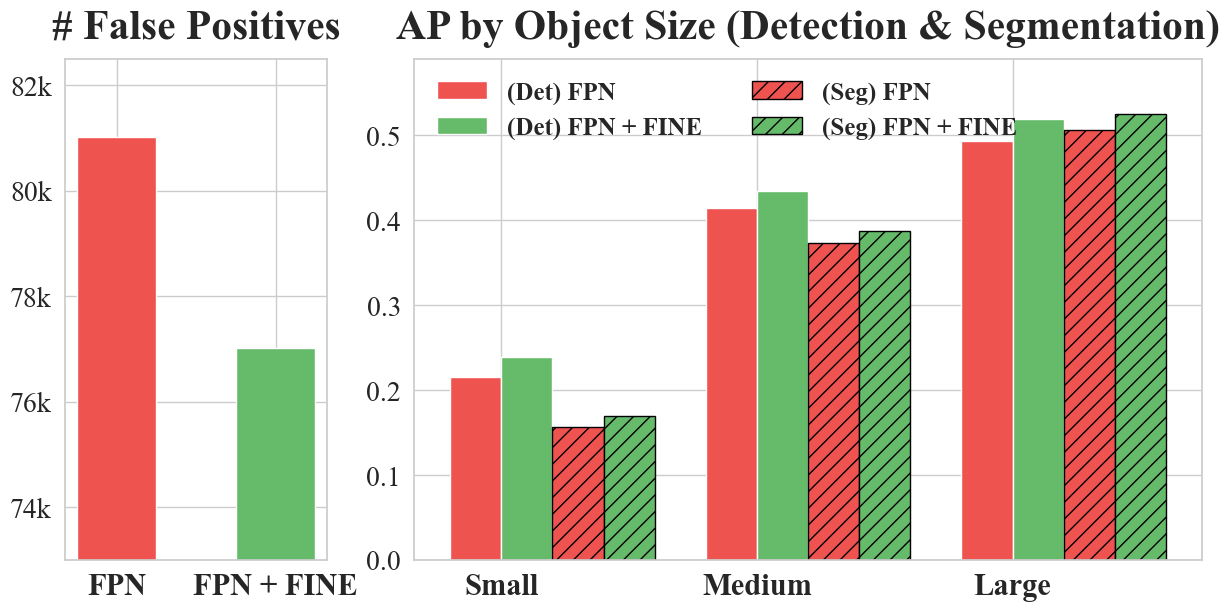

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

# 색상 정의
fpn_color = "#EF5350"   # 연한 빨강 (Light Red)
ours_color = "#66BB6A"  # 연한 초록 (Light Green)

# 데이터 정의
baseline_fp = 81013
ours_fp = 77026

sizes = ['Small', 'Medium', 'Large']
baseline_bbox_ap = np.array([0.215, 0.414, 0.493])
ours_bbox_ap     = np.array([0.239, 0.435, 0.519])

baseline_segm_ap = np.array([0.156, 0.373, 0.506])
ours_segm_ap     = np.array([0.169, 0.387, 0.525])

# Figure 및 GridSpec 설정
fig = plt.figure(figsize=(12, 6), constrained_layout=True)
gs = fig.add_gridspec(1, 4)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1:])

# === (1) False Positive Bar Plot ===
bar_positions = [0, 0.5]
bar_width_fp = 0.25

ax1.bar(bar_positions[0], baseline_fp, color=fpn_color, width=bar_width_fp, label='FPN')
ax1.bar(bar_positions[1], ours_fp, color=ours_color, width=bar_width_fp, label='FPN + FINE')

ax1.set_xticks(bar_positions)
ax1.set_xticklabels(['FPN', 'FPN + FINE'], fontsize=22, fontweight="bold")
ax1.set_title("# False Positives", fontsize=30, fontweight="bold", pad=15)
ax1.tick_params(axis='y', labelsize=20)
# ax1.legend(fontsize=20, frameon=False)

ax1.set_ylim(73000, 82500)
ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x/1000)}k"))

# === (2) Detection + Segmentation AP Bar Plot ===
x = np.arange(len(sizes))
total_width = 0.8
single_bar_width = total_width / 4

# Detection
ax2.bar(x - single_bar_width/2, baseline_bbox_ap, width=single_bar_width,
        label='(Det) FPN', color=fpn_color)
ax2.bar(x + single_bar_width/2, ours_bbox_ap, width=single_bar_width,
        label='(Det) FPN + FINE', color=ours_color)

# Segmentation
ax2.bar(x + 1.5*single_bar_width, baseline_segm_ap, width=single_bar_width,
        label='(Seg) FPN', color=fpn_color, hatch='//', edgecolor='black')
ax2.bar(x + 2.5*single_bar_width, ours_segm_ap, width=single_bar_width,
        label='(Seg) FPN + FINE', color=ours_color, hatch='//', edgecolor='black')

ax2.set_xticks(x)
ax2.set_xticklabels(sizes, fontsize=22, fontweight="bold")
ax2.set_title("AP by Object Size (Detection & Segmentation)", fontsize=30, fontweight="bold", pad=15)
ax2.tick_params(axis='y', labelsize=20)
ax2.set_ylim(0, 0.59)
ax2.legend(fontsize=20, frameon=False, ncol=2, prop={"weight": "bold", "size":18})


# 저장 및 출력
plt.savefig("fig5.pdf", bbox_inches="tight")
plt.show()

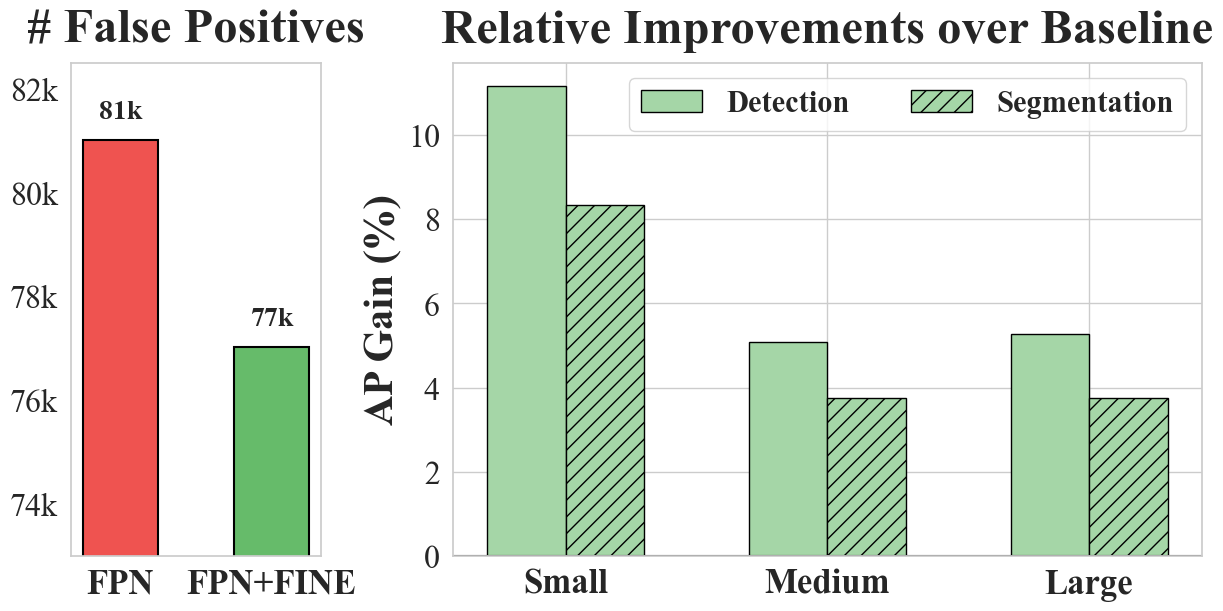

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter
# 폰트 전역 설정 (Times New Roman)
plt.rcParams['font.family'] = 'Times New Roman'


# 색상 정의
fpn_color = "#EF5350"    # 연한 빨강
fine_color = "#66BB6A"   # 연한 초록
light_green = "#A5D6A7"  # 더 연한 초록
light_gray = "#E0E0E0"   # 배경용 연회색

bar_width = 0.3

# 데이터 정의
baseline_fp = 81013
ours_fp = 77026

sizes = ['Small', 'Medium', 'Large']
baseline_bbox_ap = np.array([0.215, 0.414, 0.493])
ours_bbox_ap     = np.array([0.239, 0.435, 0.519])

baseline_segm_ap = np.array([0.156, 0.373, 0.506])
ours_segm_ap     = np.array([0.169, 0.387, 0.525])

# Figure 및 GridSpec 설정
fig = plt.figure(figsize=(12, 6), constrained_layout=True)
gs = fig.add_gridspec(1, 4)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1:])

# === (1) False Positive Bar Plot 개선 ===
bar_positions = [0, 0.5]
bar_labels = ['FPN', 'FPN+FINE']
bar_values = [baseline_fp, ours_fp]
bar_colors = [fpn_color, fine_color]

for i in range(2):
    ax1.bar(bar_positions[i], bar_values[i],
            color=bar_colors[i], width=0.25,
            edgecolor="black", linewidth=1.5)
    ax1.text(bar_positions[i], bar_values[i] + 300,
             f"{bar_values[i]//1000}k",
             ha='center', va='bottom', fontsize=20, fontweight='bold')

ax1.set_xticks(bar_positions)
ax1.set_xticklabels(bar_labels, fontsize=25, fontweight="bold")
ax1.set_title("# False Positives", fontsize=35, fontweight="bold", pad=15)
ax1.tick_params(axis='y', labelsize=23)
ax1.set_ylim(73000, 82500)
ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x/1000)}k"))
ax1.grid(False)



det_gain = (ours_bbox_ap - baseline_bbox_ap) / baseline_bbox_ap * 100
seg_gain = (ours_segm_ap - baseline_segm_ap) / baseline_segm_ap * 100

# === (2) Normalized AP Gains (Detection + Segmentation) ===
ours_color = light_green  # 더 연한 초록색으로 변경

ax2.bar(x - bar_width/2, det_gain, width=bar_width,
        label='Detection', color=ours_color, hatch='', edgecolor='black')
ax2.bar(x + bar_width/2, seg_gain, width=bar_width,
        label='Segmentation', color=ours_color, hatch='//', edgecolor='black')

ax2.set_xticks(x)
ax2.set_xticklabels(sizes, fontsize=25, fontweight="bold")
ax2.set_title("Relative Improvements over FPN", fontsize=35, fontweight="bold", pad=15)
ax2.tick_params(axis='y', labelsize=23)
ax2.set_ylabel("AP Gain (%)", fontsize=30, fontweight="bold")
ax2.axhline(0, color='black', linewidth=1.5)
ax2.legend(fontsize=20, frameon=True, ncol=2, prop={"weight": "bold", "size":22})


# 저장 및 출력
plt.savefig("fig5.pdf", bbox_inches="tight")
plt.show()

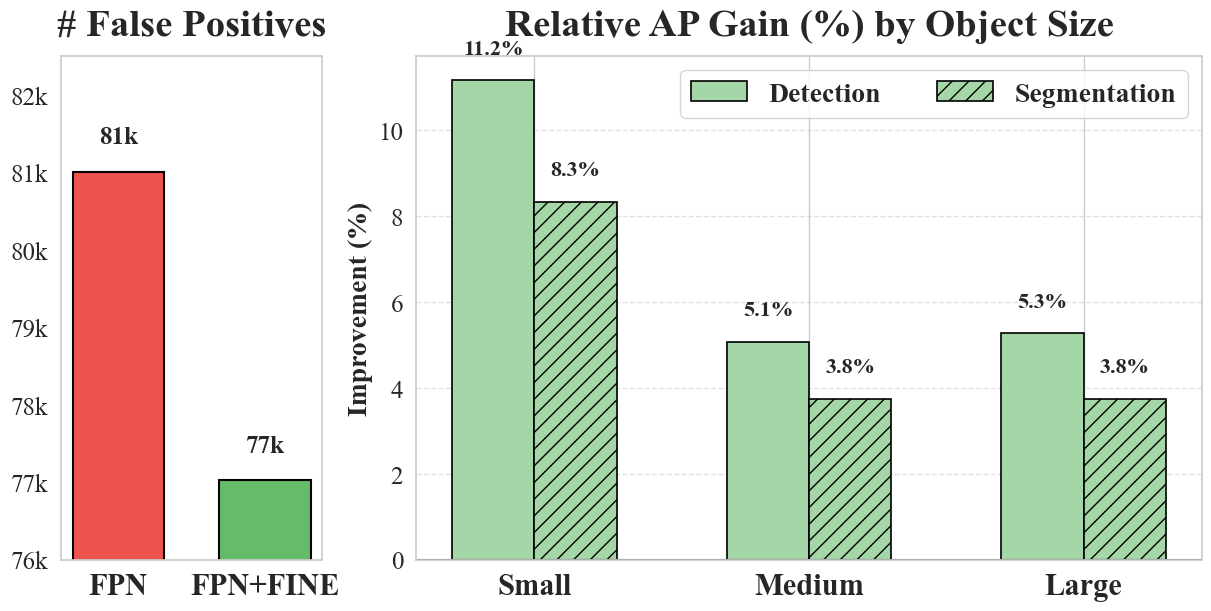

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

# 색상 정의
fpn_color = "#EF5350"    # 연한 빨강
fine_color = "#66BB6A"   # 연한 초록
light_green = "#A5D6A7"  # 더 연한 초록
light_gray = "#E0E0E0"   # 배경용 연회색

# 데이터 정의
baseline_fp = 81013
ours_fp = 77026

sizes = ['Small', 'Medium', 'Large']
x = np.arange(len(sizes))
bar_width = 0.3

baseline_bbox_ap = np.array([0.215, 0.414, 0.493])
ours_bbox_ap     = np.array([0.239, 0.435, 0.519])

baseline_segm_ap = np.array([0.156, 0.373, 0.506])
ours_segm_ap     = np.array([0.169, 0.387, 0.525])

# Figure 설정
fig = plt.figure(figsize=(12, 6), constrained_layout=True)
gs = fig.add_gridspec(1, 4)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1:])

# === (1) False Positive Bar Plot 개선 ===
bar_positions = [0.05, 0.45]
bar_labels = ['FPN', 'FPN+FINE']
bar_values = [baseline_fp, ours_fp]
bar_colors = [fpn_color, fine_color]

for i in range(2):
    ax1.bar(bar_positions[i], bar_values[i],
            color=bar_colors[i], width=0.25,
            edgecolor="black", linewidth=1.5)
    ax1.text(bar_positions[i], bar_values[i] + 300,
             f"{bar_values[i]//1000}k",
             ha='center', va='bottom', fontsize=18, fontweight='bold')

ax1.set_xticks(bar_positions)
ax1.set_xticklabels(bar_labels, fontsize=22, fontweight="bold")
ax1.set_title("# False Positives", fontsize=28, fontweight="bold", pad=15)
ax1.tick_params(axis='y', labelsize=18)
ax1.set_ylim(76000, 82500)
ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x/1000)}k"))
ax1.grid(False)

# === (2) Normalized AP Gains (Detection + Segmentation) 개선 ===
det_gain = (ours_bbox_ap - baseline_bbox_ap) / baseline_bbox_ap * 100
seg_gain = (ours_segm_ap - baseline_segm_ap) / baseline_segm_ap * 100

# Detection
bars1 = ax2.bar(x - bar_width/2, det_gain, width=bar_width,
                label='Detection', color=light_green, edgecolor='black', linewidth=1.2)

# Segmentation
bars2 = ax2.bar(x + bar_width/2, seg_gain, width=bar_width,
                label='Segmentation', color=light_green, hatch='//', edgecolor='black', linewidth=1.2)

# 각 막대 위에 텍스트 표기
for bar_group in [bars1, bars2]:
    for bar in bar_group:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width() / 2, height + 0.5,
                 f"{height:.1f}%", ha='center', va='bottom',
                 fontsize=16, fontweight='bold')

ax2.set_xticks(x)
ax2.set_xticklabels(sizes, fontsize=22, fontweight="bold")
ax2.set_title("Relative AP Gain (%) by Object Size", fontsize=28, fontweight="bold", pad=15)
ax2.tick_params(axis='y', labelsize=18)
ax2.set_ylabel("Improvement (%)", fontsize=20, fontweight="bold")
ax2.axhline(0, color='black', linewidth=1.5)
ax2.legend(fontsize=18, frameon=True, ncol=2, prop={"weight": "bold", "size":20})
ax2.grid(True, axis='y', linestyle='--', alpha=0.6)

# 저장 및 출력
plt.savefig("fig5.pdf", bbox_inches="tight")
plt.show()

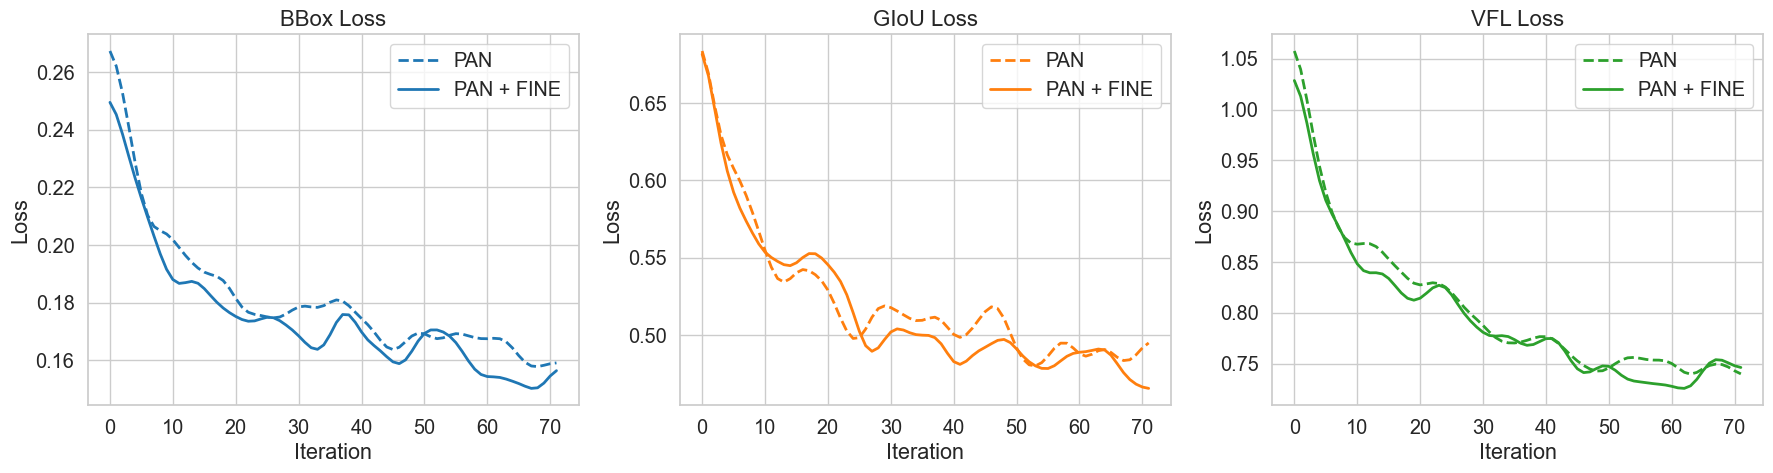

In [14]:

import re
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.ndimage import gaussian_filter1d


# 시각화 스타일 설정
sns.set_theme(style="whitegrid", palette="muted", font_scale=1.3)

# 로그 파일 경로
baseline_log_path = "rt-detr-r18-baseline.log"
ours_log_path = "rt-detr-r18-ours.log"


def parse_log(log_path):
    with open(log_path, "r") as f:
        lines = f.readlines()

    loss_bbox, loss_giou, loss_vfl = [], [], []

    for line in lines:
        if "loss_bbox:" in line:
            match = re.search(r"loss_bbox:\s*([\d.]+)", line)
            if match:
                loss_bbox.append(float(match.group(1)))
        if "loss_giou:" in line:
            match = re.search(r"loss_giou:\s*([\d.]+)", line)
            if match:
                loss_giou.append(float(match.group(1)))
        if "loss_vfl:" in line:
            match = re.search(r"loss_vfl:\s*([\d.]+)", line)
            if match:
                loss_vfl.append(float(match.group(1)))

    # 길이 맞추기 (최소 길이에 맞춰 잘라냄)
    min_len = min(len(loss_bbox), len(loss_giou), len(loss_vfl))
    loss_bbox = loss_bbox[:min_len]
    loss_giou = loss_giou[:min_len]
    loss_vfl = loss_vfl[:min_len]

    return {
        "loss_bbox": gaussian_filter1d(loss_bbox, sigma=2),
        "loss_giou": gaussian_filter1d(loss_giou, sigma=2),
        "loss_vfl": gaussian_filter1d(loss_vfl, sigma=2),
    }
# 로그 파싱
baseline_losses = parse_log(baseline_log_path)
ours_losses = parse_log(ours_log_path)

# x축 (iteration)
x_baseline = range(len(baseline_losses["loss_bbox"]))
x_ours = range(len(ours_losses["loss_bbox"]))

# 시각화
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

loss_names = ["loss_bbox", "loss_giou", "loss_vfl"]
titles = ["BBox Loss", "GIoU Loss", "VFL Loss"]
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]

for i, loss_name in enumerate(loss_names):
    axs[i].plot(x_baseline, baseline_losses[loss_name], label="PAN", color=colors[i], linestyle="--", linewidth=2)
    axs[i].plot(x_ours, ours_losses[loss_name], label="PAN + FINE", color=colors[i], linestyle="-", linewidth=2)
    axs[i].set_title(titles[i], fontsize=16)
    axs[i].set_xlabel("Iteration")
    axs[i].set_ylabel("Loss")
    axs[i].legend()

plt.tight_layout()
plt.savefig("loss_comparison_pan_vs_fine.png", dpi=300)
plt.show()

# Mask R-CNN-R50-FPN, COCO

In [15]:
# save log data to pickle
mask_fpn_reg_loss = [
    0.3086,
    0.2763,
    0.2627,
    0.2542,
    0.2490,
    0.2447,
    0.2411,
    0.2381,
    0.2360,
    0.2341,
    0.2324,
    0.2307,
    0.2301,
    0.2285,
    0.2276,
    0.2264,
    0.2063,
    0.2012,
    0.1986,
    0.1962,
    0.1942,
    0.1922,
    0.1867,
    0.1860,
    0.1855,
    0.1851,
    
]


mask_fpn_cls_loss = [
    0.3570,
    0.2810,
    0.2616,
    0.2512,
    0.2440,
    0.2388,
    0.2345,
    0.2308,
    0.2279,
    0.2255,
    0.2232,
    0.2211,
    0.2200,
    0.2181,
    0.2168,
    0.2151,
    0.1758,
    0.1680,
    0.1640,
    0.1610,
    0.1583,
    0.1558,
    0.1487,
    0.1477,
    0.1471,
    0.1466
    
]

mask_fpn_reg_loss = np.array(mask_fpn_reg_loss)
mask_fpn_cls_loss = np.array(mask_fpn_cls_loss)
# save to pickle
with open("mask_fpn_reg_loss.pkl", "wb") as f:
    pickle.dump(mask_fpn_reg_loss, f)
with open("mask_fpn_cls_loss.pkl", "wb") as f:
    pickle.dump(mask_fpn_cls_loss, f)

In [16]:
# save log data to pickle
mask_ours_reg_loss = [
    0.3072,
    0.2759,
    0.2627,
    0.2549,
    0.2497,
    0.2455,
    0.2423,
    0.2393,
    0.2371,
    0.2352,
    0.2336,
    0.2320,
    0.2310,
    0.2293,
    0.2286,
    0.2278,
    0.2071,
    0.2019,
    0.1992,
    0.1970,
    0.1951,
    0.1933,
    0.1877,
    0.1870,
    0.1866,
    0.1862,
    
]

mask_ours_cls_loss = [
    0.3478,
    0.2703,
    0.2507,
    0.2408,
    0.2332,
    0.2280,
    0.2238,
    0.2197,
    0.2169,
    0.2143,
    0.2124,
    0.2106,
    0.2088,
    0.2067,
    0.2057,
    0.2047,
    0.1677,
    0.1599,
    0.1562,
    0.1533,
    0.1511,
    0.1488,
    0.1423,
    0.1414,
    0.1409,
    0.1404,
]

mask_ours_reg_loss = np.array(mask_ours_reg_loss)
mask_ours_cls_loss = np.array(mask_ours_cls_loss)
# save to pickle
with open("mask_ours_reg_loss.pkl", "wb") as f:
    pickle.dump(mask_ours_reg_loss, f)
with open("mask_ours_cls_loss.pkl", "wb") as f:
    pickle.dump(mask_ours_cls_loss, f)

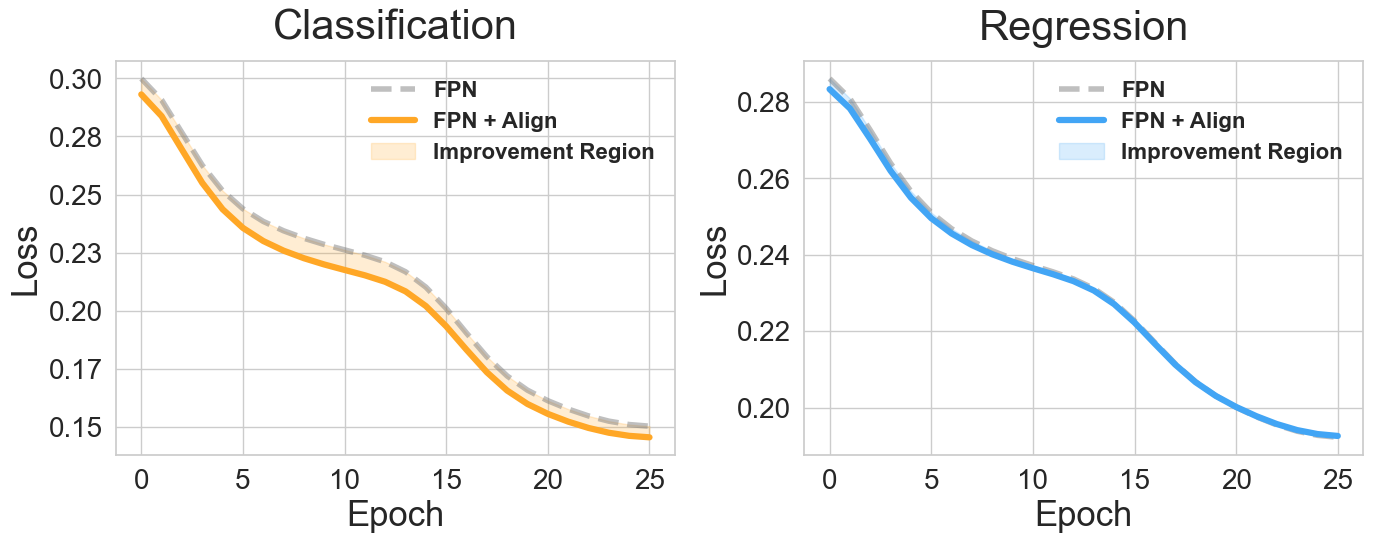

In [17]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from matplotlib.ticker import FormatStrFormatter

# === 데이터 로드
fpn_reg_loss = pickle.load(open("fpn_reg_loss.pkl", "rb"))
fpn_cls_loss = pickle.load(open("fpn_cls_loss.pkl", "rb"))
ours_reg_loss = pickle.load(open("ours_reg_loss.pkl", "rb"))
ours_cls_loss = pickle.load(open("ours_cls_loss.pkl", "rb"))

# === Gaussian smoothing
smooth_fpn_reg = gaussian_filter1d(fpn_reg_loss, sigma=2)
smooth_ours_reg = gaussian_filter1d(ours_reg_loss, sigma=2)
smooth_fpn_cls = gaussian_filter1d(fpn_cls_loss, sigma=2)
smooth_ours_cls = gaussian_filter1d(ours_cls_loss, sigma=2)

# === Plot 설정
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# === 색상 설정
fpn_color = "gray"         # 회색 (baseline 모두 공통)
cls_color = "#FFA726"      # 주황 (ours classification)
reg_color = "#42A5F5"      # 파랑 (ours regression)
fpn_label = "FPN"
ours_cls_label = "FPN + Align"
ours_reg_label = "FPN + Align"

# === [왼쪽] Classification Loss Plot
x_cls = np.arange(len(smooth_fpn_cls))
mask_cls = smooth_ours_cls < smooth_fpn_cls

ax1.plot(smooth_fpn_cls, label=fpn_label, color=fpn_color, linestyle="--", linewidth=4, alpha=0.5)
ax1.plot(smooth_ours_cls, label=ours_cls_label, color=cls_color, linestyle="-", linewidth=4.5)
ax1.fill_between(
    x_cls, smooth_fpn_cls, smooth_ours_cls,
    where=mask_cls, interpolate=True,
    color=cls_color, alpha=0.2,  # <-- ours와 같은 색상, 투명도 낮춤
    label="Improvement Region"
)

ax1.set_title("Classification", fontsize=30, pad=15)
ax1.set_xlabel("Epoch", fontsize=25)
ax1.set_ylabel("Loss", fontsize=25)
ax1.tick_params(axis="both", labelsize=20)
ax1.legend(loc="upper right", frameon=False, prop={"weight": "bold", "size": 16})
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

# === [오른쪽] Regression Loss Plot
x_reg = np.arange(len(smooth_fpn_reg))
mask_reg = smooth_ours_reg < smooth_fpn_reg

ax2.plot(smooth_fpn_reg, label=fpn_label, color=fpn_color, linestyle="--", linewidth=4, alpha=0.5)
ax2.plot(smooth_ours_reg, label=ours_reg_label, color=reg_color, linestyle="-", linewidth=4.5)
ax2.fill_between(
    x_reg, smooth_fpn_reg, smooth_ours_reg,
    where=mask_reg, interpolate=True,
    color=reg_color, alpha=0.2,  # <-- ours와 같은 색상, 투명도 낮춤
    label="Improvement Region"
)
ax2.set_title("Regression", fontsize=30, pad=15)
ax2.set_xlabel("Epoch", fontsize=25)
ax2.set_ylabel("Loss", fontsize=25)
ax2.tick_params(axis="both", labelsize=20)
ax2.legend(loc="upper right", frameon=False, prop={"weight": "bold", "size": 16})
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

# === 전체 저장
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("fig4_colored_loss_with_improvement.pdf", bbox_inches="tight")
plt.show()